# Activity 2 - Least Squares Method Linear Regression
Construct a least squares linear model for the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
    
# Loading the data from activity 1
df = pd.read_csv('activity2_measurements.csv')
df_first_year = df[:365]
rolling = pd.read_csv('activity2_rolling.csv')
window = 20

Visualising the measurements

In [2]:
df.head()

,Date,TempAvgF,Year,Month
0,2013-12-21,60,2013,12
1,2013-12-22,48,2013,12
2,2013-12-23,45,2013,12
3,2013-12-24,46,2013,12
4,2013-12-25,50,2013,12


Visualise the rolling average values

In [3]:
rolling.head(n=30)

,TempAvgF
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


Create a linear regression model using the default parameters i.e. calculate a y-intercept for the model and do not normalise the data

In [4]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now fit the model.  Where the input data is the day number for the year (1 to 365) and the output is the average temperature.  To make later calculations easier insert a column (DayOfYear) which corresponds with the day of the year for that measurement.

In [5]:
df_first_year = df_first_year.copy()
df_first_year['DayOfYear'] = [i + 1 for i in df_first_year.index]

Fit the model with the DayOfYear values as the input as df_first_year.TempAvgF as the output

In [6]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_first_year.DayOfYear.values.reshape((-1, 1)), df_first_year.TempAvgF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Print the parameters of the model

In [7]:
print(f'm = {model.coef_[0]}')
print(f'c = {model.intercept_}')

print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x + {model.intercept_:0.4f}')

m = 0.04909173467448788
c = 60.28196597922625

Model Definition
y = 0.04909x + 60.2820


What does the trendline provided by the model look like?  We can plot this simply using the first, middle and last years in the linear equation.

In [8]:
trend_x = np.array([
    1,
    182.5,
    365
])

trend_y = model.predict(trend_x.reshape((-1, 1)))
trend_y

array([60.33105771, 69.24120756, 78.20044914])

Plot the values with the trendling

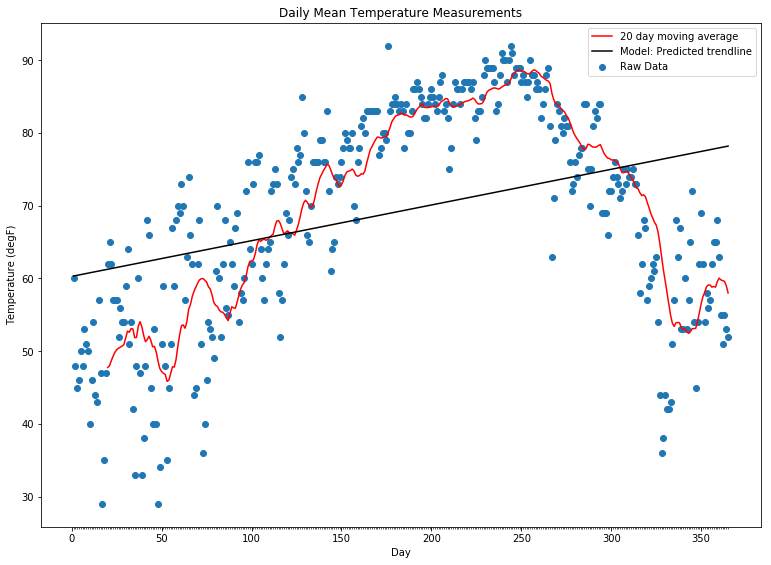

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_first_year.DayOfYear, df_first_year.TempAvgF, label='Raw Data');
ax.plot(df_first_year.DayOfYear, rolling, c='r', label=f'{window} day moving average');
ax.plot(trend_x, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();

Evaluate the performance of the model

How well does the model fit the data?  Calculate the $r^2$ score to find out.

In [10]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_first_year.DayOfYear.values.reshape((-1, 1)), df_first_year.TempAvgF)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.1222
